In [3]:
import pymc3 as pm
import theano.tensor as tt
import numpy as np
import scipy.stats as stats
import praw


from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize

In [2]:
# Ranking Reddit submissions - compare multiple "naive" ways

In [20]:
reddit = praw.Reddit(client_id="3tGpc7FJeHhOag", client_secret="SSBymfcpf00fRV-JLIQTvjTwWd4X8A", user_agent="test")
subreddit  = reddit.subreddit("politics")
top_submissions = subreddit.top(limit=100)


data = {}

for sub in top_submissions:
    data[sub.id] = sub

In [28]:
upvotes = []
downvotes = []
contents = []
subs = list(data.values())
np_subs = np.array(subs)
#print(np_subs)
for sub in subs:
    try:
        ratio = sub.upvote_ratio
        # R = (up/(up+down)), S = up-down... solve for up and down
        ups = int(round((ratio*sub.score)/(2*ratio - 1)) if ratio != 0.5 else round(sub.score/2))
        upvotes.append(ups)
        downvotes.append(ups - sub.score)
        contents.append(sub.title)
    except Exception as e:
        print(e)
        continue
votes = np.array( [ upvotes, downvotes] ).T
print(votes)

[[249570  37292]
 [171871  16998]
 [165448  12453]
 [168569  20834]
 [169826  34784]
 [156247  21306]
 [140292  10560]
 [138021   8810]
 [152486  24823]
 [165542  38831]
 [152715  26950]
 [159639  35043]
 [130961   6893]
 [144753  21630]
 [128552   8205]
 [142571  23209]
 [132288  14699]
 [136356  20375]
 [133708  18233]
 [133242  18169]
 [125458  10909]
 [127060  12566]
 [131324  17908]
 [123368  10728]
 [145902  34224]
 [128719  17553]
 [128443  17515]
 [126269  15606]
 [125997  15573]
 [131293  21373]
 [117124   8816]
 [120152  11883]
 [125347  17093]
 [123663  16863]
 [125040  18684]
 [133024  27246]
 [114103   8588]
 [133686  29346]
 [119678  16320]
 [119635  16314]
 [112520   9784]
 [113830  11258]
 [136632  34158]
 [128265  26271]
 [118066  16100]
 [125867  23975]
 [111516   9697]
 [125340  23874]
 [123170  21736]
 [115492  14274]
 [115492  14274]
 [120740  19655]
 [120676  19645]
 [110535   9612]
 [120338  19590]
 [115990  15817]
 [125896  25786]
 [110806  10959]
 [112090  1245

In [34]:
# Naive approach 1: popularity (this completely discounts +/- signal from vote)
ranking_by_pop = np_subs[np.argsort(np.sum(votes, axis=1))]

In [88]:
def compute_dist_vector(target, value):
    dists = []
    for i,s in enumerate(target):
        dists.append(i - np.where(value == s)[0][0])
    return np.array(dists)
dists = compute_dist_vector(np_subs, ranking_by_pop)
print(np.sum(dists > 0))
print(np.sqrt(np.mean(dists**2)))

51
51.96075442100509


In [89]:
# Naive approach 2: difference ups-downs
diff = votes[:, 0] - votes[:, 1]
print(diff)
ranking_by_diff = np_subs[np.argsort(diff)]
dists = compute_dist_vector(np_subs, ranking_by_diff)
print(np.sum(dists > 0))
print(np.sqrt(np.mean(dists**2)))

[212278 154873 152995 147735 135042 134941 129732 129211 127663 126711
 125765 124596 124068 123123 120347 119362 117589 115981 115475 115073
 114549 114494 113416 112640 111678 111166 110928 110663 110424 109920
 108308 108269 108254 106800 106356 105778 105515 104340 103358 103321
 102736 102572 102474 101994 101966 101892 101819 101466 101434 101218
 101218 101085 101031 100923 100748 100173 100110  99847  99636  99355
  99235  98843  98814  98678  98609  97967  97897  97767  97630  97301
  97098  97056  97049  96883  96757  96722  96375  96327  96238  96224
  95998  95824  95710  95592  95537  95483  95251  95205  95162  94998
  94501  94235  94222  94199  94077  93991  93970  93938  93835  93836]
50
57.73196688144273


In [ ]:
# Naive approach 3: difference rate (need time of submission)

In [91]:
# Naive approach 4: up-vote ratio
ratios = votes[:, 0] / np.sum(votes, axis=1)
print(ratios)
ranking_by_ratio = np_subs[np.argsort(ratios)]
dists = compute_dist_vector(np_subs, ranking_by_ratio)
print(np.sum(dists > 0))
print(np.sqrt(np.mean(dists**2)))

[0.87000021 0.91000111 0.93000039 0.89000174 0.82999853 0.88000203
 0.92999761 0.93999905 0.86000147 0.80999936 0.84999861 0.81999877
 0.94999782 0.86999874 0.94000307 0.86000121 0.89999796 0.87000019
 0.87999947 0.88000211 0.92000264 0.91000244 0.87999893 0.91999761
 0.80999967 0.87999754 0.87999973 0.89000176 0.88999788 0.86000157
 0.92999841 0.91000114 0.8799986  0.88000085 0.87000083 0.82999938
 0.93000302 0.81999853 0.87999824 0.87999912 0.92000262 0.90999936
 0.8        0.83000078 0.8799994  0.83999813 0.92000033 0.84000161
 0.84999931 0.890002   0.890002   0.86000214 0.85999957 0.919998
 0.85999943 0.87999879 0.8299996  0.90999877 0.90000321 0.79000123
 0.90000242 0.90000243 0.94000249 0.90999668 0.85999985 0.86000073
 0.88000248 0.85000036 0.87000121 0.87000236 0.90000165 0.78999988
 0.85999807 0.84999819 0.89999752 0.87999937 0.85999776 0.86000135
 0.85000218 0.82       0.83999887 0.91000188 0.92000176 0.92
 0.86999729 0.83999801 0.90000252 0.85000037 0.86999798 0.85999909
 0.

In [ ]:
# Using Bayesian modeling

In [68]:
with pm.Model() as m:
    p = pm.Uniform("p", 0, 1, shape=100)
    b = pm.Binomial("b", p=p, n=np.sum(votes, axis=1), observed=votes[:,0])
    
    trace = pm.sample(40000)
    burned_trace = trace[1000:]

/Users/andrew.chang/miniconda3/lib/python3.8/site-packages/pymc3/sampling.py:465: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 40_000 draw iterations (4_000 + 160_000 draws total) took 44 seconds.


In [77]:
print(burned_trace["p"].shape)

(156000, 100)


<AxesSubplot:title={'center':'x'}>

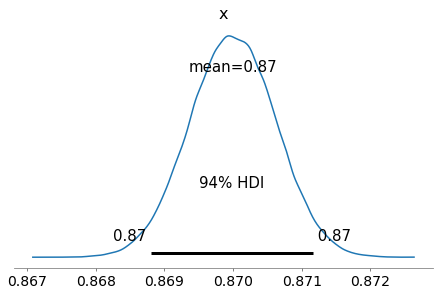

In [78]:
pm.plots.plot_posterior(burned_trace["p"][:,0])

<AxesSubplot:title={'center':'x'}>

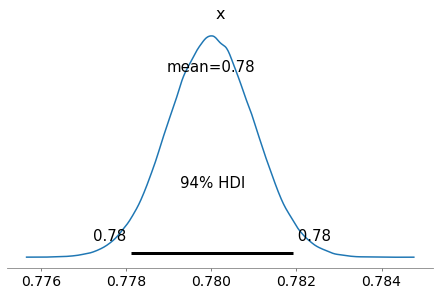

In [80]:
pm.plots.plot_posterior(burned_trace["p"][:,99])

In [95]:
# Compare using means
post_means = np.mean(burned_trace["p"], axis=0)
ranking_by_mean = np_subs[np.argsort(post_means)]
dists = compute_dist_vector(np_subs, ranking_by_mean)

print(np.sum(dists > 0))
print(np.sqrt(np.mean(dists**2)))

48
44.01295263896754


In [94]:
# Compare using 95% least plausible
print(burned_trace["p"][:,0])
lp = np.sort(burned_trace["p"])[int(N * 0.05),:]
ranking_by_lp = np_subs[np.argsort(lp)]
dists = compute_dist_vector(np_subs, ranking_by_lp)
print(ranking_by_lp[:5])
print(np_subs[:5])

print(np.sum(dists > 0))
print(np.sqrt(np.mean(dists**2)))

[0.86886246 0.86922286 0.87084988 ... 0.87020987 0.86982231 0.8698507 ]
[Submission(id='jptq5n') Submission(id='krntg6') Submission(id='i9161a')
 Submission(id='ecm1zg') Submission(id='l1k8xa')]
[Submission(id='jptq5n') Submission(id='krntg6') Submission(id='i9161a')
 Submission(id='ecm1zg') Submission(id='l1k8xa')]
0
0.0
